In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('admission_predict (1).csv')

In [ ]:
df.shape

(500, 9)

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# **Checking for null values**

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No null values

---



# **Checking for duplicate values**

In [ ]:
def remove_duplicate(data):
    data.drop_duplicates(keep="first", inplace=True)
    return "Checked Duplicates"

# Removes Duplicates from train data
remove_duplicate(df)

'Checked Duplicates'

No duplicates found

---





In [ ]:
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability'})
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Removing the serial no. column
df.drop('Serial No.', axis='columns', inplace=True)

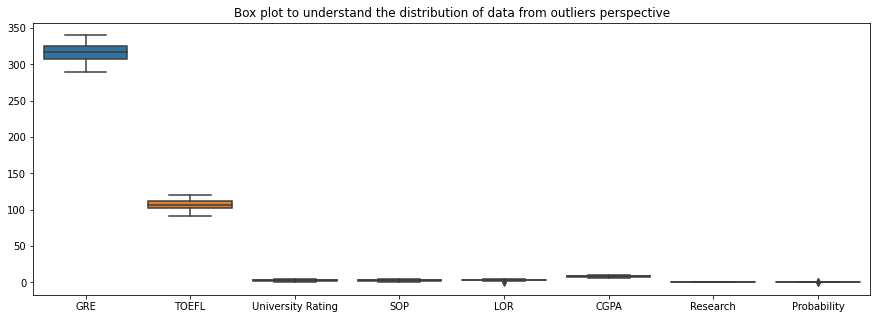

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df);
plt.title("Box plot to understand the distribution of data from outliers perspective");

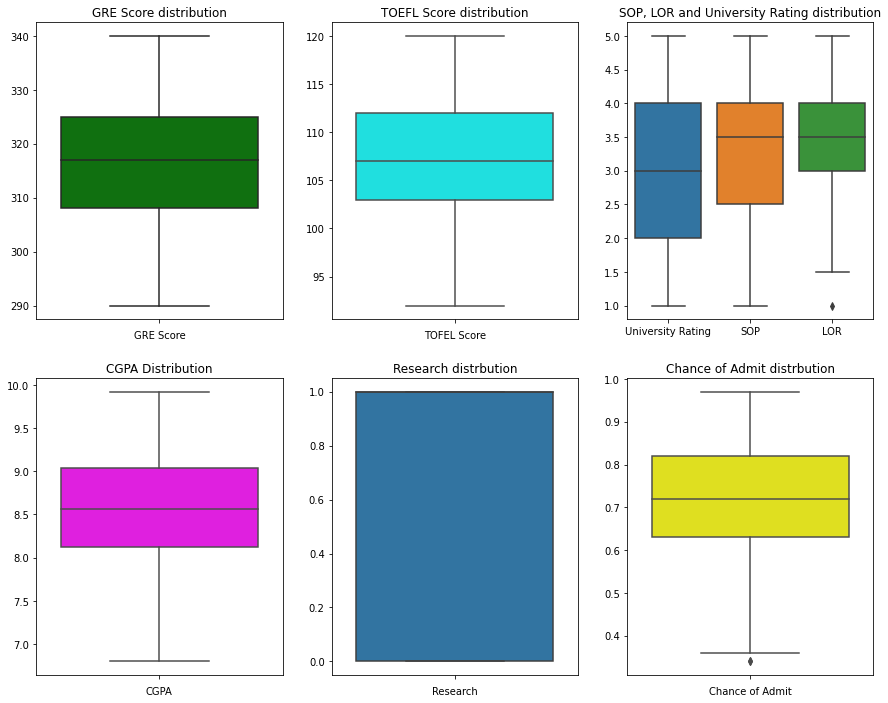

In [ ]:
#Checking individual columns 

plt.figure(figsize=(15, 12))
plt.subplot(231)
sns.boxplot(y=df["GRE"], color='green');
plt.xlabel("GRE Score");
plt.ylabel("");
plt.title("GRE Score distribution");


plt.subplot(232)
sns.boxplot(y=df["TOEFL"], color='cyan');
plt.xlabel("TOFEL Score");
plt.ylabel("");
plt.title("TOEFL Score distribution");

plt.subplot(233)
sns.boxplot(data=df[[ "University Rating","SOP", "LOR"]]);
plt.title("SOP, LOR and University Rating distribution");

plt.subplot(234)
sns.boxplot(y = df["CGPA"], color='magenta');
plt.xlabel("CGPA");
plt.ylabel("");
plt.title("CGPA Distribution");

plt.subplot(235)
sns.boxplot(y=df["Research"]);
plt.xlabel("Research");
plt.ylabel("");
plt.title("Research distrbution");

plt.subplot(236)
sns.boxplot(y=df["Probability"], color='yellow');
plt.xlabel("Chance of Admit");
plt.ylabel("");
plt.title("Chance of Admit distrbution");


**Observation from Feature wise outlier detection :**
*   In total 2 outliers have been identified.
*   Features in which outlier has been identified are LOR and Chance of Admit.
*   Based on the observation the outliers are in the lower side of the value and can be a corner cases. In explorative analysis they can be viewed in depth to take a decision on how to handle this outliers.

---

# **Explorative Data Analysis :**


## **1.   GRE Score:**





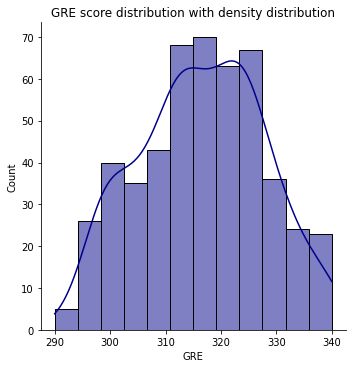

In [ ]:
sns.displot(x=df["GRE"], kde=True, color='darkblue')
plt.title("GRE score distribution with density distribution");

**Observations for GRE Score :**

*   Score is distributed in the range of 290 to 340.
*   Peaks are observed between 310 to 330 indicating most applicants have scored in this range.
*   As high as 70 applicants have scored between 315 to 320.
*   The distribution looks normal and can be further confirmed by QQ-plot.

---










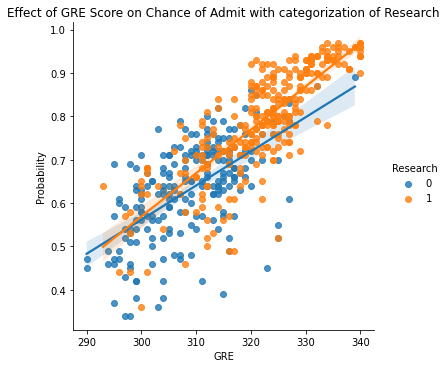

In [ ]:
#Comparison of GRE Score with Chance of Admit and Research :
sns.lmplot(y="Probability", x = "GRE", hue="Research", data=df);
plt.title("Effect of GRE Score on Chance of Admit with categorization of Research");

**Observations from Comaprision of GRE Score with Chance of Admit with Research :**

*   As the GRE Score increases So does the Chance of Admit.
*   Applicants who opts for research tends to have higher GRE Score and the Chance of Admit.

---


## **2.   TOEFL Score :**





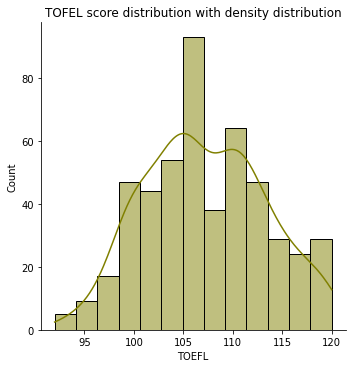

In [ ]:
sns.displot(x=df["TOEFL"], kde=True, color='olive')
plt.title("TOFEL score distribution with density distribution");

**Observations from TOFEL Score :**


*   TOFEL scores are distributed in the range of 90 to 120.
*   As high as 80 to 85 applicants have scored between 105 to 107.
*   A good number of applicants have scored in between 97 to 113.
*   Distribution seems to be normal and can be confirmed by QQ-plot.

---









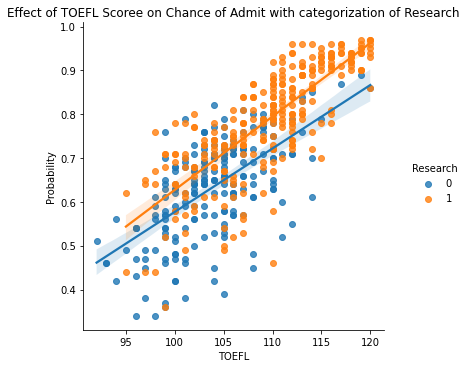

In [ ]:
#Comparison of TOFEL Score with Chance of Admit and Research :
sns.lmplot(y="Probability", x = "TOEFL", hue="Research", data=df);
plt.title("Effect of TOEFL Scoree on Chance of Admit with categorization of Research");

**Observations from TOFEL Score and Chance of Admit and Research:**
*   As the TOFEL Score increases So does the chance of admit.
*   Applicants who have opted for research tend to have higher chance of admit.
---




## **3.   University Ratings**



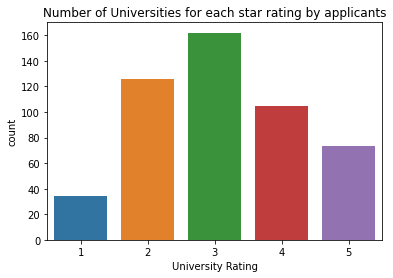

In [ ]:
sns.countplot(x=df["University Rating"]);
plt.title("Number of Universities for each star rating by applicants");

**Observations on University Rating :**

*   Close to 160 applicants have marked their university as 3 stars.

*   3 stars are followed by 2 stars for universities.
*   1 star is given by only 30 to 35 applicants which is lowest.






---




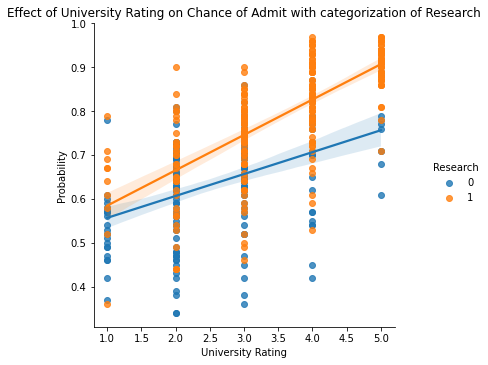

In [ ]:
#Comparison of University Rating with Chance of Admit and Research :
sns.lmplot(y="Probability", x = "University Rating", hue="Research", data=df);
plt.title("Effect of University Rating on Chance of Admit with categorization of Research");

**Observation of University Rating with Chance of Admit and Research :**
*   As University Rating increases so does the chance of admit.
*   Universities with higher rating have more research opted applicants.
---




## **4. SOP: Statement of Purpose**



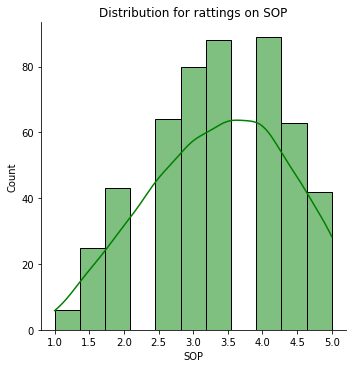

In [ ]:
sns.displot(x=df["SOP"], kde=True, color='green');
plt.title("Distribution for rattings on SOP");

**Observations from statement of purpose :**

*   Most of the applicants have received 3.5 to 4.0 stars in their SOP.

*   Based on the plot, rating distribution can be bucketed in 3 sections 1.0 to 2.1 as low ratings, 2.5 to 3.6 as mid level ratings and 3.9 to 5.0 as high level of ratings.
*   Each section described in the above point can further be divided into low, mid and high.This provides a really well quantified information on strength of statement of purpose.


---






 

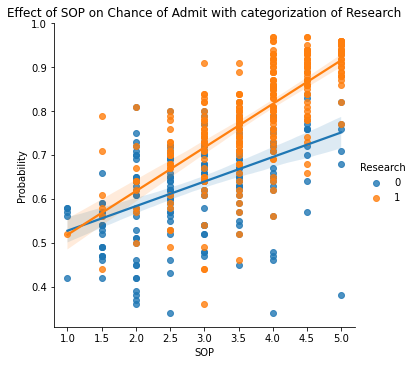

In [ ]:
#Comparison of Statement of Purpose (SOP) with Chance of Admit and Research :
sns.lmplot(y="Probability", x = "SOP", hue="Research", data=df);
plt.title("Effect of SOP on Chance of Admit with categorization of Research");

**Observations from SOP with Chance of Admit and Research :**

*   Strength of Statement of purpose has a great impact on Chance of Admit.
*   Applicant with higher score on SOP and opted for research have almost sure shot at chance of admit.

---





## **5.   LOR : Letter of Recommendations**



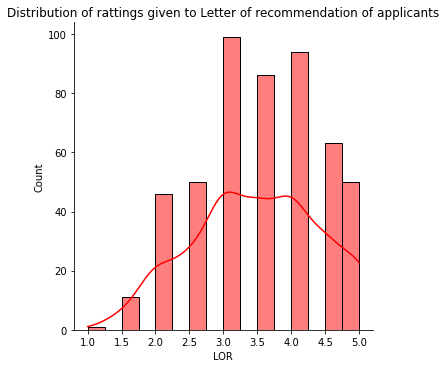

In [ ]:
sns.displot(x=df["LOR"], kde=True, color='red');
plt.title("Distribution of rattings given to Letter of recommendation of applicants");

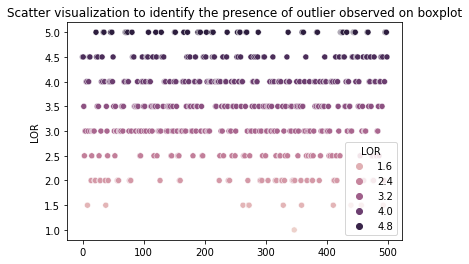

In [ ]:
sns.scatterplot(x=df.index, y = df["LOR"], hue=df["LOR"]);
plt.title("Scatter visualization to identify the presence of outlier observed on boxplot");

**Observations for LOR :**

*   Most applicants have a recommendation ratting of 3.0.
*   A very good number of applicants are having LOR ratting between 3 to 4 inclusive.
*   The outlier observed in boxplot is basically just one applicant having the lowest rating of 1.

---



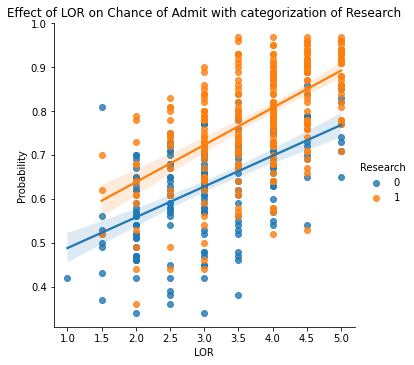

In [ ]:
#Comparision of Letter of Recommendations (LOR) with Chance of Admit and Research :
sns.lmplot(y="Probability", x = "LOR", hue="Research", data=df);
plt.title("Effect of LOR on Chance of Admit with categorization of Research");

**Observations from LOR score with Chance of Admit and Research :**

*   As the score of LOR improves , the Chance of Admit also improves with it.
*   From the graph if the applicant has opted to research then chances of admit is higher.
---

## **6.   CGPA**

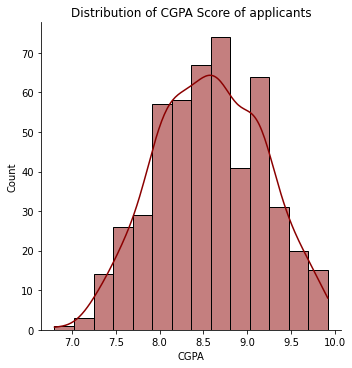

In [ ]:
sns.displot(x=df["CGPA"], kde=True, color='darkred');
plt.title("Distribution of CGPA Score of applicants");

**Observations for CGPA :**

*   CGPA scores are distributed in range of 6.9 to 9.7 inclusive.
*   More than 70 applicants have the CGPA of 8.56.
*   Saturation can be observed as a great number of applicants have a CGPA between 7.90 to 9.25.

---



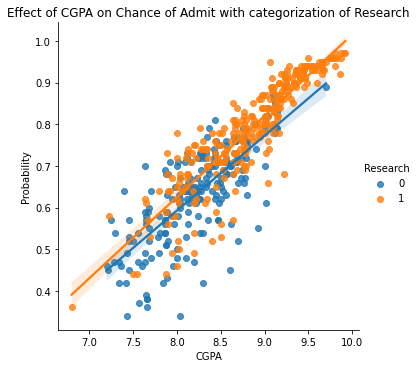

In [ ]:
#Comparison of CGPA with Chance of Admit and Research :
sns.lmplot(y="Probability", x = "CGPA", hue="Research", data=df);
plt.title("Effect of CGPA on Chance of Admit with categorization of Research");

**Observations from CGPA with Chance of Admit and Research :**

*   As the CGPA increases the chance of Admit increases tremendously.
*   Option of research with CGPA donot seems to have much of the impact compare to other features.
---



## **7.   Research Paper**



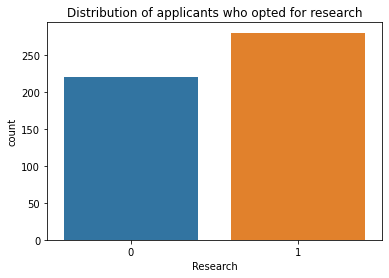

In [ ]:
sns.countplot(x=df["Research"]);
plt.title("Distribution of applicants who opted for research");

**Observations on Research :**

*   Out of 500 applicants approx 280 applicants have opted for research.
*   In precentage 56% applicants are chosing for research option.

---



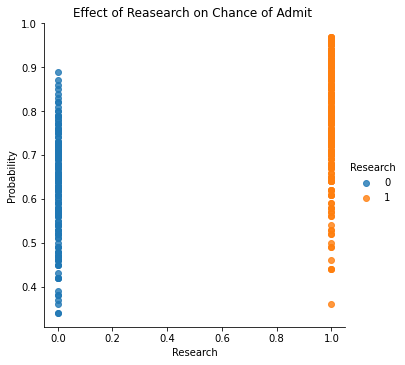

In [ ]:
#Comparison of Research Opted with Chance of Admit :
sns.lmplot(y="Probability", x = "Research", hue='Research', data=df);
plt.title("Effect of Reasearch on Chance of Admit ");

**Observations from Research with Chance of Admit :**

*   Opting for research doesn't seem to have much effect on their chances of admission.

---




## **8.   Chance of Admission**



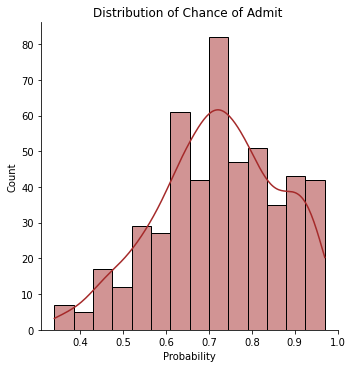

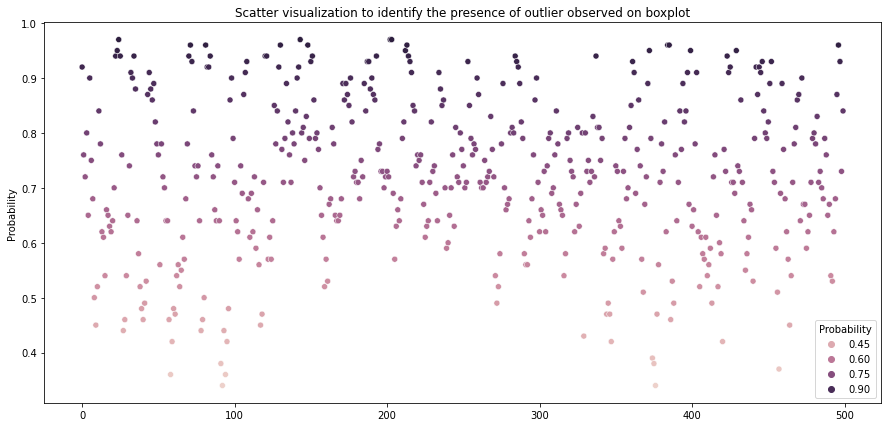

In [ ]:
sns.displot(x=df["Probability"], kde=True, color='brown');
plt.title("Distribution of Chance of Admit ");

plt.figure(figsize=(15,7))
sns.scatterplot(x=df.index, y = df["Probability"], hue=df["Probability"]);
plt.title("Scatter visualization to identify the presence of outlier observed on boxplot");

**Observations from Chance of admit :**

*   Chances are distributed between 0.34 to 0.97 inclusive.
*   Highest number of applicants have chance of admit at 0.72.
*   Most number of students have a chance of admmit above 0.61.
*   The one outlier that was observed in box plot was because of one student having a low chance of 0.34 which is also the minimum value registerd in the data.

---



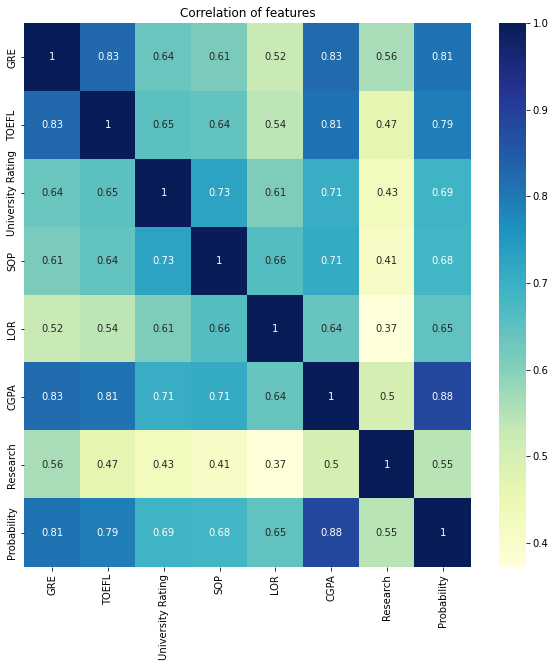

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");
plt.title("Correlation of features");

**Observations from multivariate analysis :**

*   CGPA Score has the most impact on Chance of Admit.
*   It is followed by GRE and TOFEL Score.
*   Research option has the least impact on the chance of admit.
*   University Ranking, statement of purpose and the letter of recommendation are also having impact on the chance of admit.
---

# **Feature Engineering and Modelling :**

In [ ]:
df.shape

(500, 8)

In [ ]:
df= df.reset_index(drop=True)

In [ ]:
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df_copy = df.copy(deep=True)

In [ ]:
# Splitting the dataset in features and label
X = df_copy.drop('Probability', axis='columns')
y = df_copy['Probability']

In [ ]:
X.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [ ]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Probability, dtype: float64

In [ ]:
y=y.to_frame()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
X

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 1.        , 1.        , ..., 1.        , 0.88461538,
        1.        ],
       [0.44      , 0.39285714, 0.75      , ..., 1.        , 0.5224359 ,
        0.        ],
       [0.74      , 0.75      , 0.75      , ..., 0.875     , 0.71794872,
        0.        ]])

In [ ]:
y

array([[0.92063492],
       [0.66666667],
       [0.6031746 ],
       [0.73015873],
       [0.49206349],
       [0.88888889],
       [0.65079365],
       [0.53968254],
       [0.25396825],
       [0.17460317],
       [0.28571429],
       [0.79365079],
       [0.6984127 ],
       [0.44444444],
       [0.42857143],
       [0.31746032],
       [0.50793651],
       [0.49206349],
       [0.46031746],
       [0.44444444],
       [0.47619048],
       [0.57142857],
       [0.95238095],
       [0.96825397],
       [1.        ],
       [0.95238095],
       [0.66666667],
       [0.15873016],
       [0.19047619],
       [0.31746032],
       [0.49206349],
       [0.63492063],
       [0.9047619 ],
       [0.88888889],
       [0.95238095],
       [0.85714286],
       [0.47619048],
       [0.38095238],
       [0.28571429],
       [0.22222222],
       [0.19047619],
       [0.23809524],
       [0.3015873 ],
       [0.84126984],
       [0.9047619 ],
       [0.85714286],
       [0.82539683],
       [0.873

In [ ]:
# Splitting the dataset into train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(len(X_train), len(X_test))

400 100


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
Regressors = {'Linear Regression' : LinearRegression(normalize=True),
                            
               'Lasso' : Lasso(normalize=True),
               
               'SVR' : SVR(gamma='auto'),
              
               'Decision Tree' : DecisionTreeRegressor(criterion='mse', splitter='random'),
              
               'Random Forest' : RandomForestRegressor(n_estimators=20),

               'KNeighbors' : KNeighborsRegressor(n_neighbors=20)
 }

print( list(Regressors.keys()) )
print( list(Regressors.values()) )

['Linear Regression', 'Lasso', 'SVR', 'Decision Tree', 'Random Forest', 'KNeighbors']
[LinearRegression(normalize=True), Lasso(normalize=True), SVR(gamma='auto'), DecisionTreeRegressor(criterion='mse', splitter='random'), RandomForestRegressor(n_estimators=20), KNeighborsRegressor(n_neighbors=20)]


In [ ]:
tab=pd.DataFrame()

def mod(name,model,x,y):
  model.fit(x, y)

  scores = cross_val_score(model, x, y, cv=5)
  v=round(sum(scores)*100/len(scores),3)

  mae=round(mean_absolute_error(y_test,model.predict(X_test)),3)

  mse=round(mean_squared_error(y_test,model.predict(X_test)),3)

  rmse=round(np.sqrt(mean_squared_error(y_test,model.predict(X_test))),3)

  r2 = round(r2_score(y_test,model.predict(X_test)),3)

  n=40
  k=2
  adj_r2 = round(1 - ((1-r2)*(n-1)/(n-k-1)),3)

  result=[name ,v, mae, mse, rmse, r2, adj_r2]
  return (result)

In [ ]:
for i in range(0,6):
  tab=pd.concat([tab,pd.DataFrame(mod(list(Regressors.keys())[i], list(Regressors.values())[i], X_train, y_train)).transpose()], axis=0, ignore_index=True)

In [ ]:
tab.set_axis(['Model', 'Cross Val Score', 'MAE','MSE','RMSE','R2 Score','Adj R2 Score'], axis='columns', inplace=True)

In [ ]:
tab

,Model,Cross Val Score,MAE,MSE,RMSE,R2 Score,Adj R2 Score
0,Linear Regression,80.609,0.066,0.007,0.086,0.821,0.811
1,Lasso,-3.607,0.165,0.041,0.204,-0.007,-0.061
2,SVR,79.448,0.068,0.008,0.087,0.816,0.806
3,Decision Tree,57.103,0.102,0.019,0.138,0.539,0.514
4,Random Forest,75.721,0.068,0.008,0.09,0.805,0.794
5,KNeighbors,75.041,0.071,0.009,0.095,0.779,0.767


Since the **Linear Regression algorithm has the highest accuracy**, the model selected for this problem is Linear Regression.

In [ ]:
# Creating Linear Regression Model
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.8214787365889659

In [ ]:
round(
    sc_y.inverse_transform(
        lin_reg.predict(sc_X.transform([[320, 113, 2, 2.0, 2.5, 8.64, 1]])))[0][0]*100,2)

73.63

A student has following details:
*   GRE Score: 320
*   TOEFL Score: 113
*   University Rating: 2
*   SOP Rating: 2
*   LOR Rating: 2.5
*   CGPA: 8.64
*   Opted for Research: Yes
*   **Chances of Admission**: 73.63%

---





In [ ]:
round(
    sc_y.inverse_transform(
        lin_reg.predict(sc_X.transform([[337, 118, 4, 4.5, 4.5, 9.65, 0]])))[0][0]*100,2)

92.85

A student has following details:
*   GRE Score: 337
*   TOEFL Score: 118
*   University Rating: 4
*   SOP Rating: 4.5
*   LOR Rating: 4.5
*   CGPA: 9.65
*   Opted for Research: No
*   **Chances of Admission**: 92.85%

---



